### Team DataDudes - Progress Report

#### AI Perceptions Across Professionals

**Team members:** \
Prathyush Sajith \
Syed Muqtadeer \
Muhsin Adan\
Ammaar Khan \
Zain Farooq 

## Data Preprocessing

Used pyreadstat and pandas to preprocess the data (clean and drop NAs). The cleaned data is stored in W119preprocessed.csv file.

In [207]:
import pyreadstat
import pandas as pd

df, meta = pyreadstat.read_sav("ATP_W119.sav")

variables = [
    'AIHCCOMF_W119',    # Comfort with AI in healthcare
    'MEDBIAS_W119',     # Perceived medical bias
    'HCMEDBIAS_W119',   # Change in bias with AI
    'SCDETECT1_W119',   # Heard about AI for skin cancer
    'SCDETECT2_W119',   # Advance level of AI for skin cancer
    'SCDETECT3_W119',   # Want AI in skin cancer screening
    'SCDETECT4_W119',   # Accuracy of AI diagnoses
    'AIMH1_W119',       # Heard about AI mental health chatbots
    'AIMH2_W119',       # Advance level of AI chatbots
    'AIMH3_W119',       # Want to use AI chatbots
    'AIMH5_W119',       # Should AI chatbots be used with human therapists
    'AIPAIN1_W119',     # Heard about AI for pain meds
    'AIPAIN2_W119',     # Advance level of AI for pain meds
    'AIPAIN3_W119',     # Want AI to decide pain meds
    'AIPAIN4_W119',     # Impact of AI on pain treatment
    'SROBOT1_W119',     # Heard about surgical robots
    'SROBOT2_W119',     # Advance level of surgical robots
    'SROBOT3_W119',      # Want surgical robots in surgery
    'AI_HEARD_W119',
    'F_AGECAT', 'F_GENDER', 'F_RACETHNMOD', # Age category
    'AIKNOW1_W119',  # Chatbot uses AI
    'AIKNOW2_W119',  # Playlist recommendation
    'AIKNOW3_W119',  # Spam categorization
    'AIKNOW5_W119',  # Wearable fitness trackers
    'AIKNOW6_W119',  # Product recommendations
    'AIKNOW7_W119', 'F_EDUCCAT', 'F_INC_TIER2'   # Security camera alerts
]

missing_vars = [var for var in variables if var not in df.columns]
if missing_vars:
    print(f"Warning: Missing variables {missing_vars}. Adjust your list.")
else:
    df_subset = df[variables].copy()

df_clean = df_subset.dropna(subset=['AIHCCOMF_W119'])

response_maps = {
    'AIHCCOMF_W119': {
        1: "Very comfortable",
        2: "Somewhat comfortable",
        3: "Somewhat uncomfortable",
        4: "Very uncomfortable"
    },
    'MEDBIAS_W119': {
        1: "Major problem",
        2: "Minor problem",
        3: "Not a problem"
    },
    'HCMEDBIAS_W119': {
        1: "Definitely get better",
        2: "Probably get better",
        3: "Stay the same",
        4: "Probably get worse",
        5: "Definitely get worse"
    },
    'SCDETECT1_W119': {
        1: "A lot",
        2: "A little",
        3: "Nothing"
    },
    'SCDETECT2_W119': {
        1: "Major advance",
        2: "Minor advance",
        3: "Not an advance",
        9: "Not sure"
    },
    'SCDETECT3_W119': {
        1: "Definitely want",
        2: "Probably want",
        3: "Probably not",
        4: "Definitely not"
    },
    'SCDETECT4_W119': {
    1: "More accurate",
    2: "Less accurate",
    3: "Not make much difference"
},
    'F_AGECAT': {
    1: "18-29",
    2: "30-49",
    3: "50-64",
    4: "65+"
    },
    'AI_HEARD_W119': {
        1: "A lot",
        2: "A little",
        3: "Nothing"
    },
    'F_GENDER' : {
    1: "Male",
    2: "Female"
    },
        'SROBOT1_W119': {  # Awareness of surgical robots
        1: "A lot",
        2: "A little",
        3: "Nothing"
    },
    'SROBOT2_W119': {  # Perceived advancement
        1: "Major advance",
        2: "Minor advance",
        3: "Not an advance",
        9: "Not sure"
    },
    'SROBOT3_W119': {  # Willingness to use
        1: "Definitely want",
        2: "Probably want",
        3: "Probably NOT want",
        4: "Definitely NOT want"

    },
        'AIPAIN1_W119': {  # Awareness of surgical robots
        1: "A lot",
        2: "A little",
        3: "Nothing"
    },
    'AIPAIN2_W119': {  # Perceived advancement
        1: "Major advance",
        2: "Minor advance",
        3: "Not an advance",
        9: "Not sure"
    },
    'AIPAIN3_W119': {  # Willingness to use
        1: "Definitely want",
        2: "Probably want",
        3: "Probably NOT want",
        4: "Definitely NOT want"
    },
    
        'AIMH1_W119': {  # Awareness of surgical robots
        1: "A lot",
        2: "A little",
        3: "Nothing"
    },
    'AIMH2_W119': {  # Perceived advancement
        1: "Major advance",
        2: "Minor advance",
        3: "Not an advance",
        9: "Not sure"
    },
    'AIMH3_W119': {  # Willingness to use
        1: "Definitely want",
        2: "Probably want",
        3: "Probably NOT want",
        4: "Definitely NOT want"
    },
    
    'AIKNOW1_W119': {
        1: "Chatbot answers questions",
        2: "Online survey",
        3: "Contact form",
        4: "FAQ webpage",
        9: "Not sure"
    },
    'AIKNOW2_W119': {
        1: "Bluetooth speakers",
        2: "Playlist recommendation",
        3: "WiFi streaming",
        4: "Shuffle play",
        9: "Not sure"
    },
    'AIKNOW3_W119': {
        1: "Mark email as read",
        2: "Schedule email",
        3: "Categorize spam",  # Correct answer
        4: "Sort by time",
        9: "Not sure"
    },
    'AIKNOW5_W119': {
        1: "Wearable fitness trackers",  # Correct answer
        2: "Thermometers",
        3: "COVID-19 tests",
        4: "Pulse oximeters",
        9: "Not sure"
    },
    # AIKNOW6: Online shopping (correct answer: product recommendations)
    'AIKNOW6_W119': {
        1: "Account storage",
        2: "Purchase history",
        3: "Product recommendations",  # Correct answer
        4: "Customer reviews",
        9: "Not sure"
    },
    # AIKNOW7: Home devices (correct answer: security camera alerts)
    'AIKNOW7_W119': {
        1: "Program thermostat",
        2: "Security camera alerts",  # Correct answer
        3: "Light timer",
        4: "Water filter light",
        9: "Not sure"
    }
}

for var, mapping in response_maps.items():
    if var in df_clean.columns:
        df_clean[var] = df_clean[var].map(mapping)

# Save preprocessed data
df_clean.to_csv("W119preprocessed.csv", index=False)

### Healthcare and medical professionals

Overall Comfort Distribution (%):
 AIHCCOMF_W119
Somewhat uncomfortable    37.8
Somewhat comfortable      34.1
Very uncomfortable        21.6
Very comfortable           6.5
Name: proportion, dtype: float64


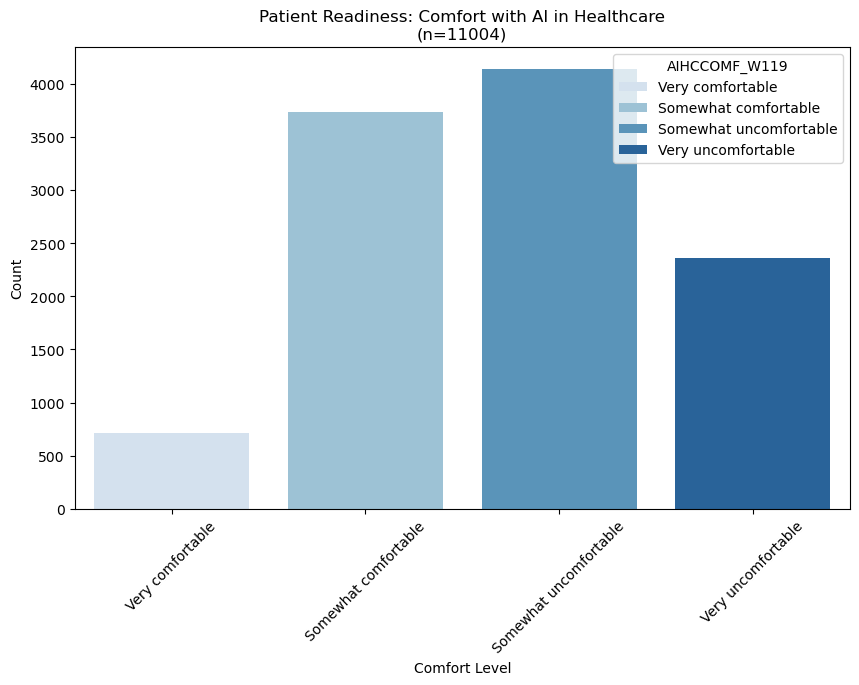

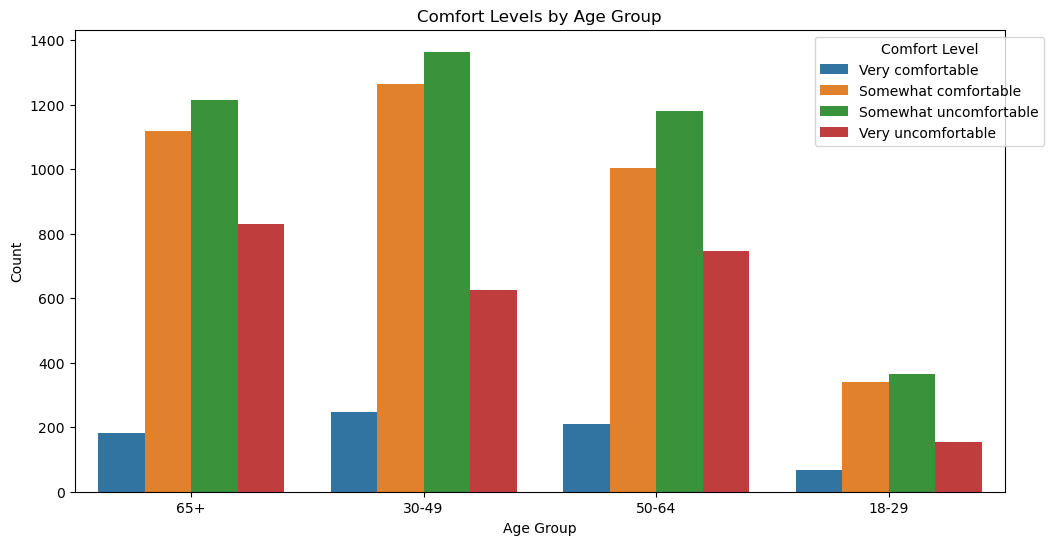

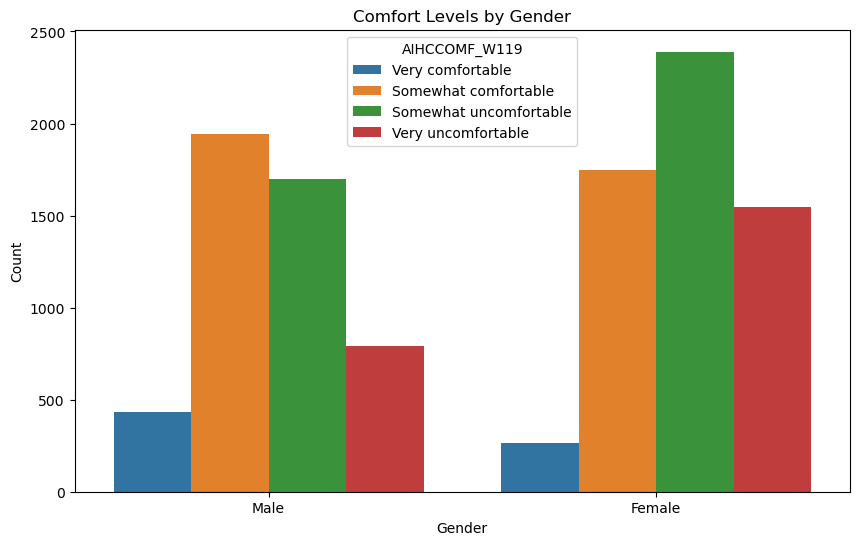


Comfort Levels by AI Familiarity (%):
 AIHCCOMF_W119  Somewhat comfortable  Somewhat uncomfortable  Very comfortable  \
AI_HEARD_W119                                                                   
A little                       33.5                    41.2               4.3   
A lot                          40.7                    31.4              11.6   
Nothing                        20.9                    35.5               5.6   

AIHCCOMF_W119  Very uncomfortable  
AI_HEARD_W119                      
A little                     20.9  
A lot                        16.2  
Nothing                      38.1  

Chi-square p-value: 0.0000


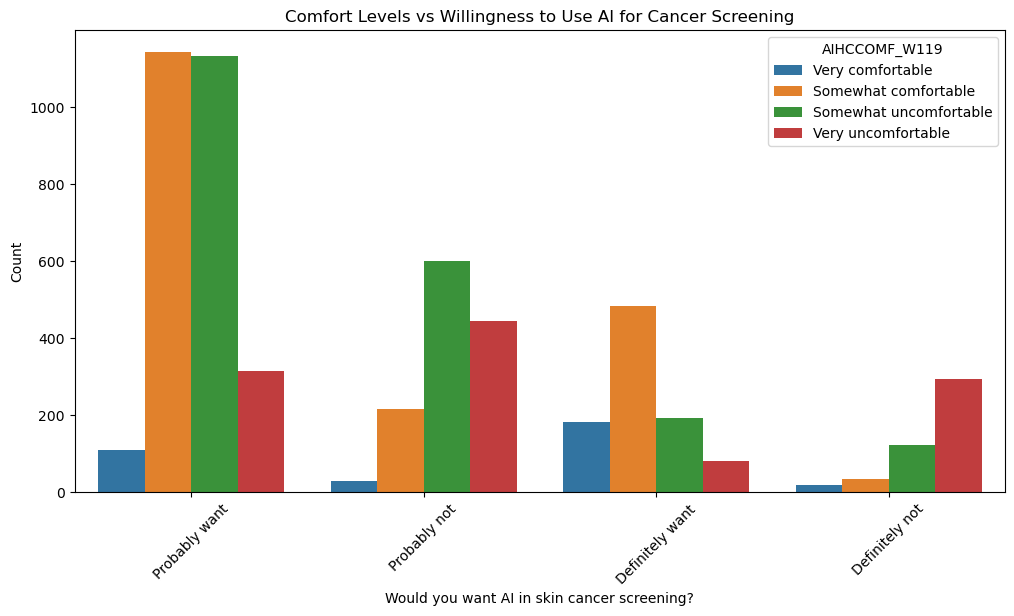


Comfort Levels by Perceived Medical Bias (%):
 AIHCCOMF_W119  Somewhat comfortable  Somewhat uncomfortable  Very comfortable  \
MEDBIAS_W119                                                                    
Major problem                  35.0                    36.8               7.1   
Minor problem                  36.9                    39.9               6.3   
Not a problem                  29.6                    36.2               6.1   

AIHCCOMF_W119  Very uncomfortable  
MEDBIAS_W119                       
Major problem                21.1  
Minor problem                17.0  
Not a problem                28.1  


In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load preprocessed data
df = pd.read_csv("W119preprocessed.csv")

# --------------------------------------------------
# 1. Overall Comfort Level Distribution
# --------------------------------------------------
comfort_dist = df['AIHCCOMF_W119'].value_counts(normalize=True).mul(100).round(1)
print("Overall Comfort Distribution (%):\n", comfort_dist)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AIHCCOMF_W119', 
             order=["Very comfortable", "Somewhat comfortable",
                    "Somewhat uncomfortable", "Very uncomfortable"], hue= 'AIHCCOMF_W119',
             palette="Blues")
plt.title("Patient Readiness: Comfort with AI in Healthcare\n(n={})".format(len(df)))
plt.xlabel("Comfort Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# --------------------------------------------------
# 2. Demographic Analysis (Age/Gender)
# --------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='F_AGECAT', hue='AIHCCOMF_W119',
             hue_order=["Very comfortable", "Somewhat comfortable",
                        "Somewhat uncomfortable", "Very uncomfortable"])
plt.title("Comfort Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Comfort Level", bbox_to_anchor=(1.05, 1))
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='F_GENDER', hue='AIHCCOMF_W119',
             hue_order=["Very comfortable", "Somewhat comfortable",
                        "Somewhat uncomfortable", "Very uncomfortable"])
plt.title("Comfort Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# --------------------------------------------------
# 3. Relationship with AI Familiarity (AI_HEARD_W119)
# --------------------------------------------------
cross_tab = pd.crosstab(df['AI_HEARD_W119'], df['AIHCCOMF_W119'], 
                       normalize='index').mul(100).round(1)
print("\nComfort Levels by AI Familiarity (%):\n", cross_tab)

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['AI_HEARD_W119'], df['AIHCCOMF_W119']))
print(f"\nChi-square p-value: {p:.4f}")

# --------------------------------------------------
# 4. Connection to Specific AI Applications
# --------------------------------------------------
# Willingness to use AI for skin cancer screening
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='SCDETECT3_W119', hue='AIHCCOMF_W119',
             hue_order=["Very comfortable", "Somewhat comfortable",
                        "Somewhat uncomfortable", "Very uncomfortable"])
plt.title("Comfort Levels vs Willingness to Use AI for Cancer Screening")
plt.xlabel("Would you want AI in skin cancer screening?")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Relationship with perceived medical bias
bias_cross_tab = pd.crosstab(df['MEDBIAS_W119'], df['AIHCCOMF_W119'], 
                            normalize='index').mul(100).round(1)
print("\nComfort Levels by Perceived Medical Bias (%):\n", bias_cross_tab)

Current Perception of Medical Bias (%):
 MEDBIAS_W119
Major problem    37.2
Minor problem    36.2
Not a problem    26.7
Name: proportion, dtype: float64


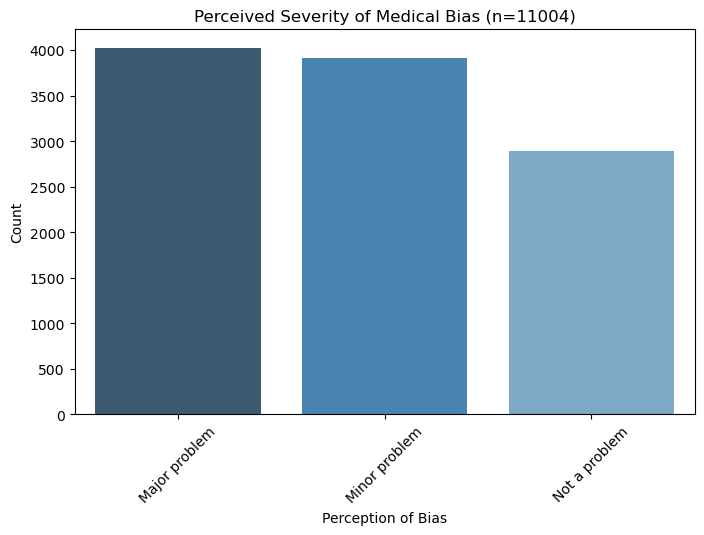


Expected Impact of AI on Medical Bias (%):
 HCMEDBIAS_W119
Stay the same            40.9
Probably get better      38.0
Probably get worse        9.3
Definitely get better     8.6
Definitely get worse      3.2
Name: proportion, dtype: float64


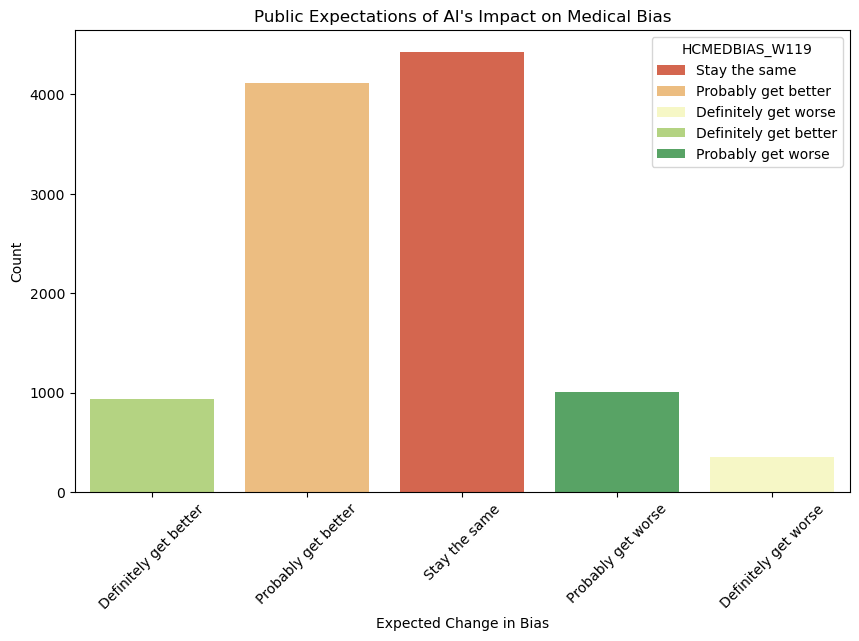


Current Bias Perception vs. AI's Expected Impact (%):
 HCMEDBIAS_W119  Definitely get better  Definitely get worse  \
MEDBIAS_W119                                                  
Major problem                    10.4                   5.7   
Minor problem                     7.7                   1.2   
Not a problem                     7.4                   2.6   

HCMEDBIAS_W119  Probably get better  Probably get worse  Stay the same  
MEDBIAS_W119                                                            
Major problem                  43.8                13.3           26.7  
Minor problem                  45.5                 7.9           37.7  
Not a problem                  18.9                 5.4           65.7  

Chi-square p-value: 0.0000


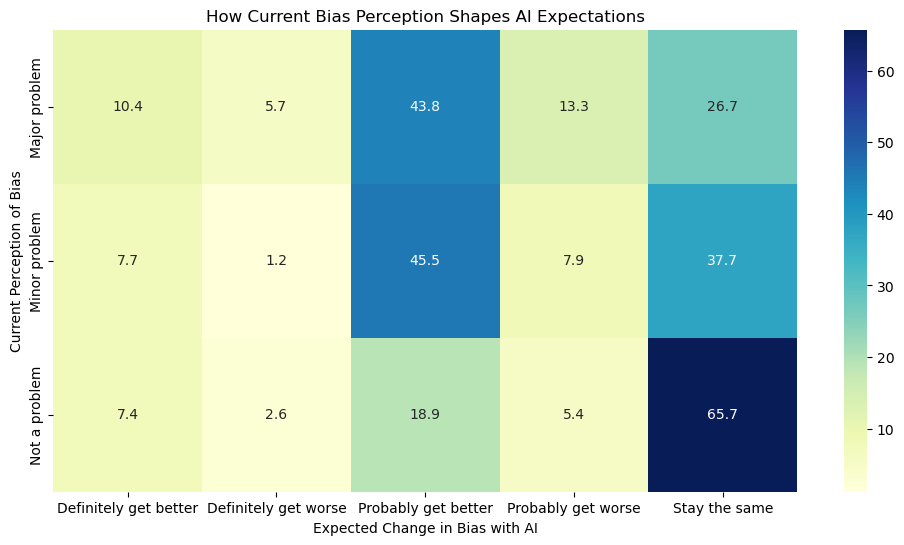

In [210]:
# Current perception of medical bias (MEDBIAS)
medbias_dist = df_clean['MEDBIAS_W119'].value_counts(normalize=True).mul(100).round(1)
print("Current Perception of Medical Bias (%):\n", medbias_dist)

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_clean,
    x='MEDBIAS_W119',
    hue='MEDBIAS_W119',  # Assign x variable to hue
    order=["Major problem", "Minor problem", "Not a problem"],
    palette="Blues_d",
    legend=False  # Disable redundant legend
)

plt.title("Perceived Severity of Medical Bias (n={})".format(len(df_clean)))
plt.xlabel("Perception of Bias")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Expected change in bias with AI (HCMEDBIAS)
hcmedbias_dist = df_clean['HCMEDBIAS_W119'].value_counts(normalize=True).mul(100).round(1)
print("\nExpected Impact of AI on Medical Bias (%):\n", hcmedbias_dist)

# Plot
plt.figure(figsize=(10, 6))
order = ["Definitely get better", "Probably get better", "Stay the same", "Probably get worse", "Definitely get worse"]
sns.countplot(data=df_clean, x='HCMEDBIAS_W119', hue='HCMEDBIAS_W119', order=order, palette="RdYlGn")
plt.title("Public Expectations of AI's Impact on Medical Bias")
plt.xlabel("Expected Change in Bias")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Relationship between current bias perception and AI's expected impact
cross_tab = pd.crosstab(df_clean['MEDBIAS_W119'], df_clean['HCMEDBIAS_W119'], normalize='index').mul(100).round(1)
print("\nCurrent Bias Perception vs. AI's Expected Impact (%):\n", cross_tab)

# Statistical test (Chi-square)
chi2, p, _, _ = chi2_contingency(pd.crosstab(df_clean['MEDBIAS_W119'], df_clean['HCMEDBIAS_W119']))
print(f"\nChi-square p-value: {p:.4f}")

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("How Current Bias Perception Shapes AI Expectations")
plt.xlabel("Expected Change in Bias with AI")
plt.ylabel("Current Perception of Bias")
plt.show()

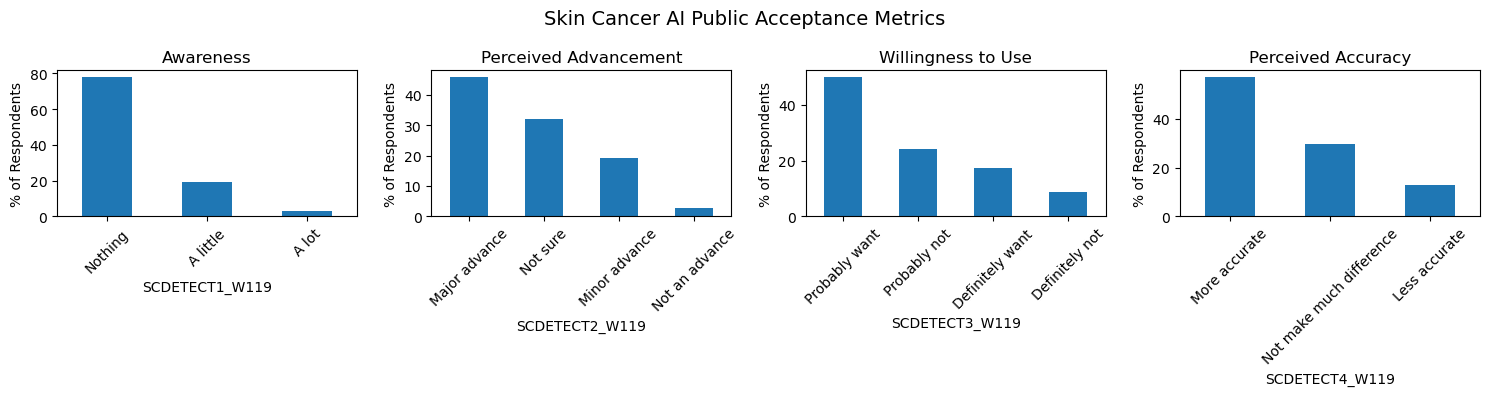

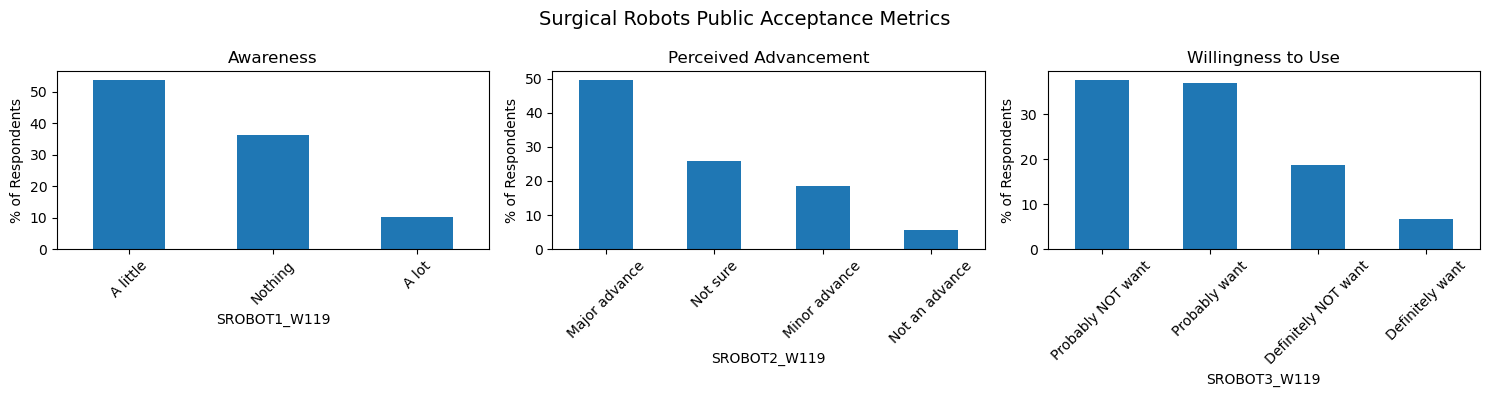

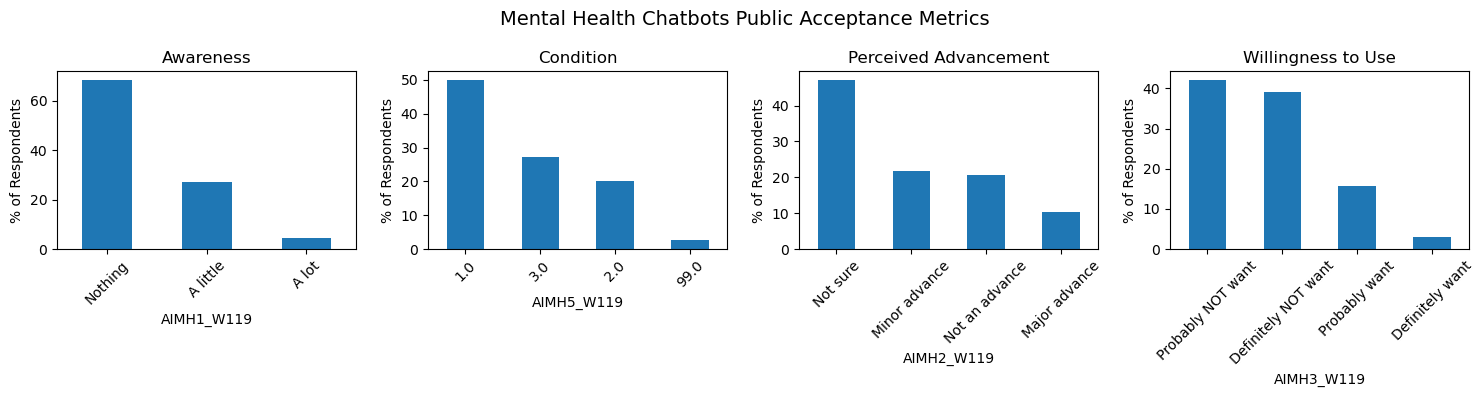

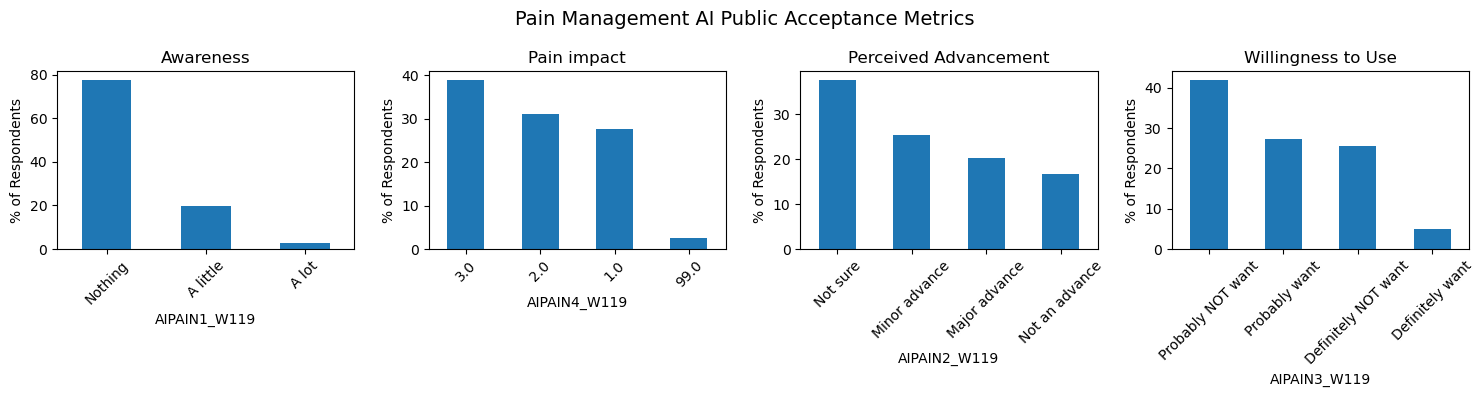

In [211]:
# --------------------------------------
# 1. Skin Cancer Detection (SCDETECT1-4)
# --------------------------------------
# Awareness
sc_awareness = df['SCDETECT1_W119'].value_counts(normalize=True).mul(100)
# Perceived advancement
sc_advance = df['SCDETECT2_W119'].value_counts(normalize=True).mul(100)
# Willingness to use
sc_willingness = df['SCDETECT3_W119'].value_counts(normalize=True).mul(100)
# Perceived accuracy
sc_accuracy = df['SCDETECT4_W119'].value_counts(normalize=True).mul(100)

# --------------------------------------
# 2. Mental Health Chatbots (AIMH1-5)
# --------------------------------------
mh_awareness = df['AIMH1_W119'].value_counts(normalize=True).mul(100)
mh_advance = df['AIMH2_W119'].value_counts(normalize=True).mul(100)
mh_willingness = df['AIMH3_W119'].value_counts(normalize=True).mul(100)
mh_condition = df['AIMH5_W119'].value_counts(normalize=True).mul(100)  # Usage conditions

# --------------------------------------
# 3. Pain Medication (AIPAIN1-4)
# --------------------------------------
pain_awareness = df['AIPAIN1_W119'].value_counts(normalize=True).mul(100)
pain_advance = df['AIPAIN2_W119'].value_counts(normalize=True).mul(100)
pain_willingness = df['AIPAIN3_W119'].value_counts(normalize=True).mul(100)
pain_impact = df['AIPAIN4_W119'].value_counts(normalize=True).mul(100)

# --------------------------------------
# 4. Surgical Robots (SROBOT1-3)
# --------------------------------------
robot_awareness = df['SROBOT1_W119'].value_counts(normalize=True).mul(100)
robot_advance = df['SROBOT2_W119'].value_counts(normalize=True).mul(100)
robot_willingness = df['SROBOT3_W119'].value_counts(normalize=True).mul(100)

# -------------------------------
# Visualization & Prioritization
# -------------------------------
def plot_metrics(app_name, metrics_dict, figsize=(15,4)):
    fig, axs = plt.subplots(1, len(metrics_dict), figsize=figsize)
    fig.suptitle(f"{app_name} Public Acceptance Metrics", fontsize=14)
    
    for ax, (title, data) in zip(axs, metrics_dict.items()):
        data.plot(kind='bar', ax=ax, color='#1f77b4')
        ax.set_title(title)
        ax.set_ylabel("% of Respondents")
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Skin Cancer Detection Metrics
plot_metrics("Skin Cancer AI", {
    "Awareness": sc_awareness,
    "Perceived Advancement": sc_advance,
    "Willingness to Use": sc_willingness,
    "Perceived Accuracy": sc_accuracy
})

plot_metrics("Surgical Robots", {
    "Awareness": robot_awareness,
    "Perceived Advancement": robot_advance,
    "Willingness to Use": robot_willingness
})

plot_metrics("Mental Health Chatbots", {
    "Awareness": mh_awareness,
    "Condition": mh_condition,
    "Perceived Advancement": mh_advance,
    "Willingness to Use": mh_willingness
})

plot_metrics("Pain Management AI", {
    "Awareness": pain_awareness,
    "Pain impact": pain_impact,
    "Perceived Advancement": pain_advance,
    "Willingness to Use": pain_willingness
})

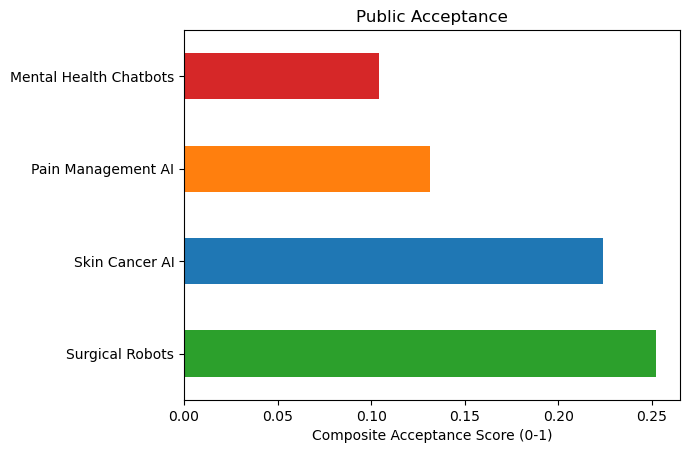

In [212]:
# Calculate Composite Scores (example)
def calculate_score(awareness, advancement, willingness):
    """Normalize metrics to 0-1 scale and average"""
    return (
        awareness.get("A lot", 0)/100 * 0.3 + 
        advancement.get("Major advance", 0)/100 * 0.2 + 
        willingness.get("Definitely want", 0)/100 * 0.2 +
        awareness.get("A little", 0)/100 * 0.1 + 
        advancement.get("Minor advance", 0)/100 * 0.1 + 
        willingness.get("Probably want", 0)/100 * 0.1         
    )

scores = {
    "Skin Cancer AI": calculate_score(sc_awareness, sc_advance, sc_willingness),
    "Mental Health Chatbots": calculate_score(mh_awareness, mh_advance, mh_willingness),
    "Pain Management AI": calculate_score(pain_awareness, pain_advance, pain_willingness),
    "Surgical Robots": calculate_score(robot_awareness, robot_advance, robot_willingness)
}

# Prioritization Results
pd.Series(scores).sort_values(ascending=False).plot(
    kind='barh', 
    color=['#2ca02c','#1f77b4','#ff7f0e','#d62728'],
    title="Public Acceptance"
)
plt.xlabel("Composite Acceptance Score (0-1)")
plt.show()

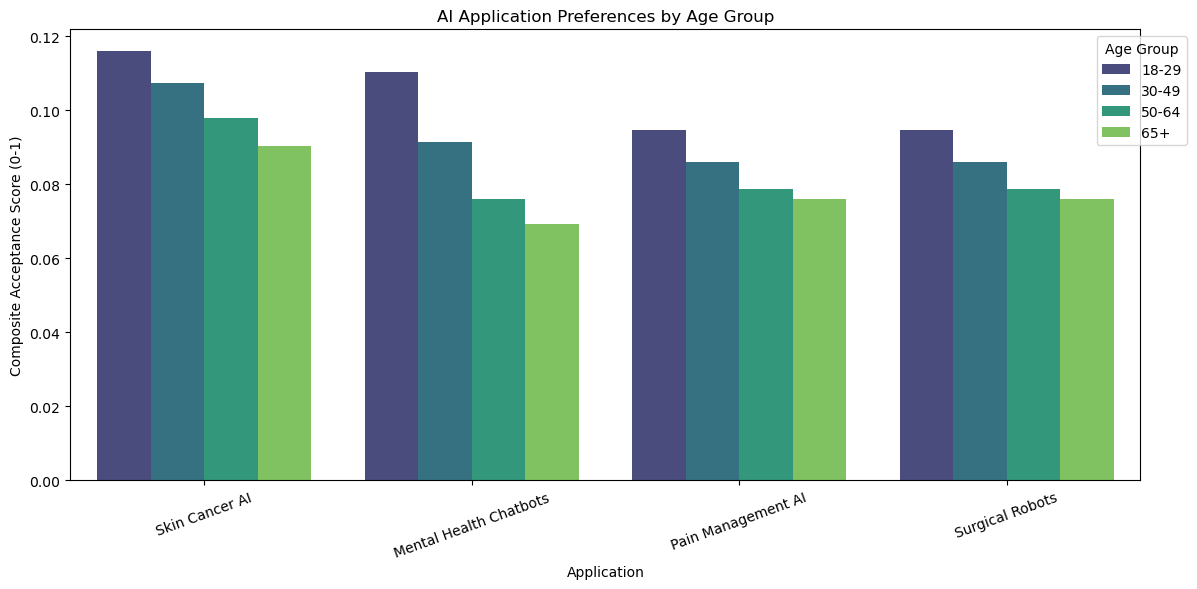

In [230]:
# Define age groups and applications
age_groups = ['18-29', '30-49', '50-64', '65+']
applications = ["Skin Cancer AI", "Mental Health Chatbots", "Pain Management AI", "Surgical Robots"]

# Calculate composite scores for each age group and application
results = []
for app in applications:
    for age in age_groups:
        # Filter data for age group
        subset = df[df['F_AGECAT'] == age]
        
        # Calculate metrics (adjust variables as needed)
        awareness = (subset['SCDETECT1_W119'] == "A lot").mean() if app == "Skin Cancer AI" else \
                    (subset['AIMH1_W119'] == "A lot").mean() if app == "Mental Health Chatbots" else \
                    (subset['AIPAIN1_W119'] == "A lot").mean()
        
        willingness = (subset['SCDETECT3_W119'] == "Definitely want").mean() if app == "Skin Cancer AI" else \
                      (subset['AIMH3_W119'] == "Definitely want").mean() if app == "Mental Health Chatbots" else \
                      (subset['AIPAIN3_W119'] == "Definitely want").mean()
        
        # Composite score (same weights as before)
        score = 0.4*awareness + 0.3*((subset['SCDETECT2_W119'] == "Major advance").mean()) + 0.3*willingness
        
        results.append({
            "Age Group": age,
            "Application": app,
            "Composite Score": score
        })

# Convert to DataFrame
df_scores = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_scores,
    x="Application",
    y="Composite Score",
    hue="Age Group",
    palette="viridis",
    order=applications,
    hue_order=age_groups
)
plt.title("AI Application Preferences by Age Group")
plt.ylabel("Composite Acceptance Score (0-1)")
plt.xticks(rotation=20)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()